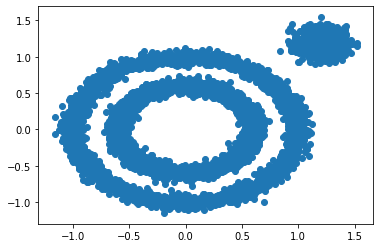

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
X1, y1=datasets.make_circles(n_samples=5000, factor=.6,
                                      noise=.05)
X2, y2 = datasets.make_blobs(n_samples=1000, n_features=2, centers=[[1.2,1.2]], cluster_std=[[.1]],
               random_state=9)

X = np.concatenate((X1, X2))
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

In [18]:
X.shape

(6000, 2)

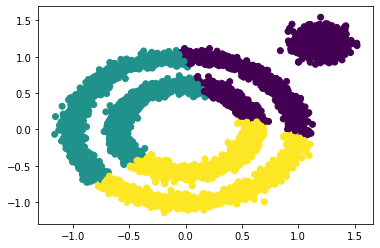

In [19]:


from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()



# DBSCAN

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
db = DBSCAN(eps=3, min_samples=2)
db.fit(X)
db.labels_


array([0, 0, 0, ..., 0, 0, 0])

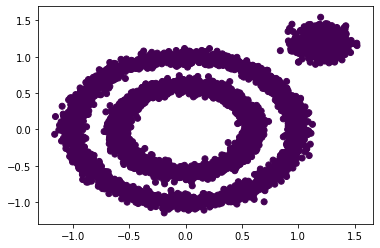

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=db.labels_)
plt.show()

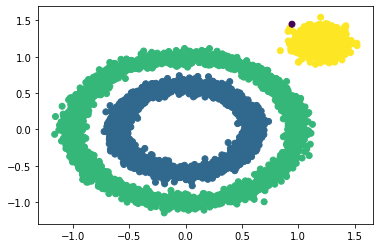

In [23]:
y_pred = DBSCAN(eps = 0.1, min_samples = 10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [24]:
import sklearn.metrics.pairwise as pw
pw.cosine_similarity
pw.cosine_distances

<function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>

In [25]:
X_cos_res = pw.cosine_similarity(X)
X_cos_res.shape

(6000, 6000)

In [26]:
X_cos_res=X_cos_res+1
X_cos_res

array([[2.        , 1.98601604, 1.86344208, ..., 1.0113965 , 0.96995457,
        1.01296074],
       [1.98601604, 2.        , 1.76730127, ..., 1.17787674, 1.13694991,
        1.17941593],
       [1.86344208, 1.76730127, 2.        , ..., 0.50542499, 0.46983727,
        0.50678523],
       ...,
       [1.0113965 , 1.17787674, 0.50542499, ..., 2.        , 1.99914121,
        1.99999878],
       [0.96995457, 1.13694991, 0.46983727, ..., 1.99914121, 2.        ,
        1.99907517],
       [1.01296074, 1.17941593, 0.50678523, ..., 1.99999878, 1.99907517,
        2.        ]])

In [27]:
def cos_text(a,b):
    fenzi = np.dot(a,b)
    fenmu1 = np.sqrt(np.sum([np.square(i) for i in a]))
    fenmu2 = np.sqrt(np.sum([np.square(j) for j in b]))
    return fenzi/(fenmu1*fenmu2)
cos_text([3,0],[1,2])

0.4472135954999579

In [28]:
import numpy as np


def cos_sim(vector_a, vector_b):
    """
    计算两个向量之间的余弦相似度
    :param vector_a: 向量 a 
    :param vector_b: 向量 b
    :return: sim
    """
    vector_a = np.mat(vector_a)
    vector_b = np.mat(vector_b)
    num = float(vector_a * vector_b.T)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    cos = num / denom
    return cos
cos_sim([3,0],[1,2])

def cos_sim(vector_a, vector_b):
    """
    计算两个向量之间的余弦相似度
    :param vector_a: 向量 a 
    :param vector_b: 向量 b
    :return: sim
    """
   
    num = np.dot(vector_a , vector_b)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    cos = num / denom
    return cos

cos_sim([3,0],[1,2])

0.4472135954999579

In [29]:
X_cos_res.shape

(6000, 6000)

In [38]:


db = DBSCAN(eps=1, min_samples=5,metric="precomputed")
db.fit(X_cos_res)
db.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
np.sum(db.labels_)

0

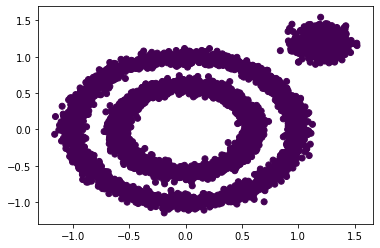

In [41]:

plt.scatter(X[:, 0], X[:, 1], c=db.labels_)
plt.show()